In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os
import seaborn as sns
from random import shuffle
from tqdm import *
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.layers import Activation, Dense
from keras.preprocessing.image import ImageDataGenerator
import keras

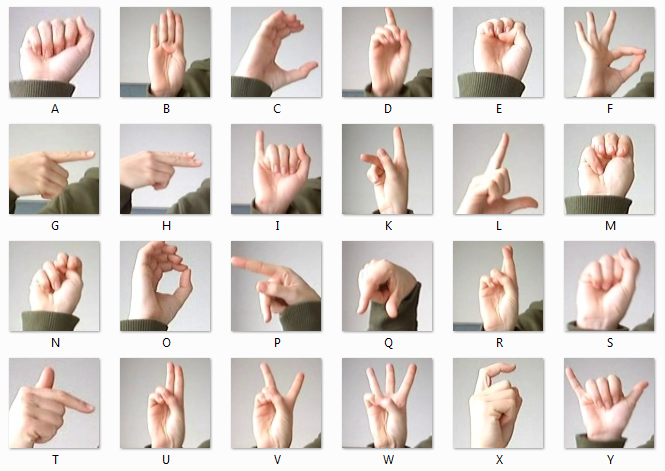

In [3]:
# Load image from file

image = Image.open("/content/drive/MyDrive/STP598 Project dataset/archive/amer_sign2.png")
image.show()

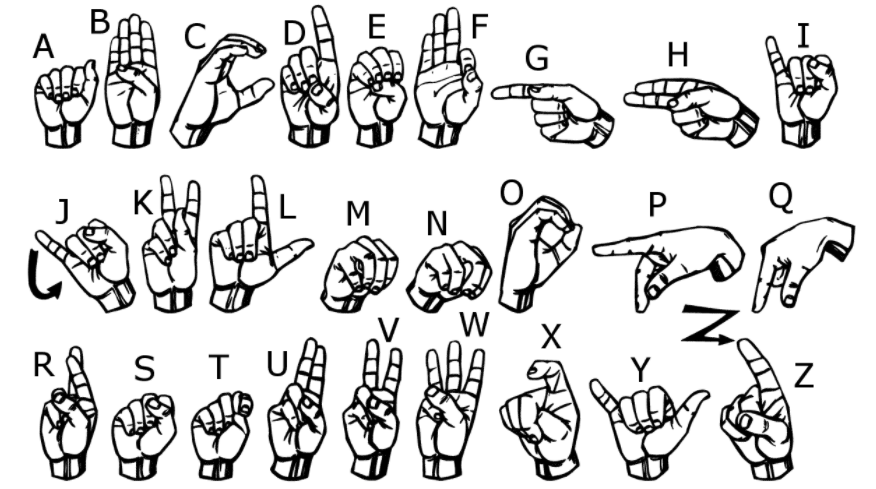

In [4]:
# Load image from file

image = Image.open("/content/drive/MyDrive/STP598 Project dataset/archive/american_sign_language.PNG")
image.show()

In [5]:
# Load training and test datasets from CSV files

Train_data = pd.read_csv('/content/drive/MyDrive/STP598 Project dataset/archive/sign_mnist_train.csv')
Test_data = pd.read_csv('/content/drive/MyDrive/STP598 Project dataset/archive/sign_mnist_test.csv')

In [6]:
Train_data.shape

(27455, 785)

In [7]:
Train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
Test_data.shape

(7172, 785)

In [9]:
Test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [10]:
# Separate input features (images) and output labels (sign classes) from training and test datasets

Train_X = np.array(Train_data.drop(columns=['label']))
Test_X = np.array(Test_data.drop(columns=['label']))
Train_Y = np.array(Train_data['label'])
Test_Y = np.array(Test_data['label'])

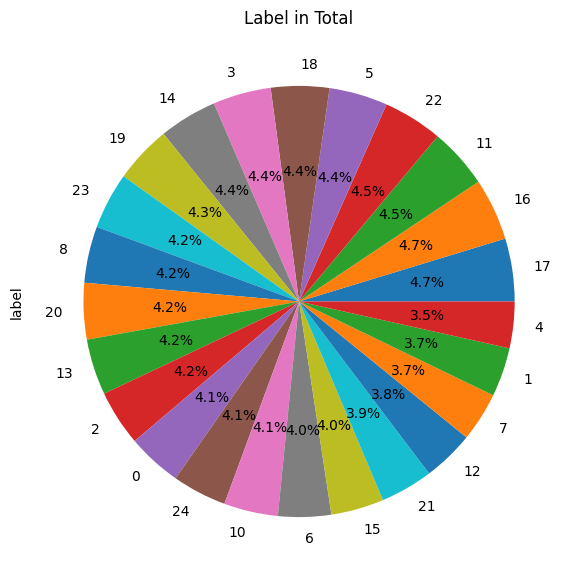

In [11]:
# Visualize the distribution of sign classes in the training dataset using a pie chart

Train_data['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title("Label in Total")
plt.show()

In [12]:
# Reshape input features from 1D arrays to 3D arrays and normalize pixel values between 0 and 1

Train_X = np.array(Train_X).reshape((-1, 28, 28,1)).astype(np.uint8) / 255.0
Test_X = np.array(Test_X).reshape((-1, 28, 28,1)).astype(np.uint8) / 255.0

In [13]:
#Printing data shapes

print("Training data shape - input: ", Train_X.shape)
print("Training data shape - output: ", Train_Y.shape)
print("Testing data shape - input: ", Test_X.shape)
print("Testing data shape - output: ", Test_Y.shape)

Training data shape - input:  (27455, 28, 28, 1)
Training data shape - output:  (27455,)
Testing data shape - input:  (7172, 28, 28, 1)
Testing data shape - output:  (7172,)


In [14]:
#Defining the CNN model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, 2, input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(64,2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(32, 2, input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(64,2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(32, 2, input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(64,2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))


opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        8224      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        8256      
                                                        

In [15]:
history= model.fit(Train_X, Train_Y, epochs=5, validation_data=(Test_X, Test_Y))

Epoch 1/5
858/858 [==============================] - 81s 93ms/step - loss: 2.3885 - accuracy: 0.2376 - val_loss: 1.3249 - val_accuracy: 0.5590
Epoch 2/5
858/858 [==============================] - 81s 94ms/step - loss: 1.0007 - accuracy: 0.6432 - val_loss: 0.6167 - val_accuracy: 0.7835
Epoch 3/5
858/858 [==============================] - 78s 91ms/step - loss: 0.5405 - accuracy: 0.8055 - val_loss: 0.5508 - val_accuracy: 0.8066
Epoch 4/5
858/858 [==============================] - 80s 93ms/step - loss: 0.3553 - accuracy: 0.8728 - val_loss: 0.4060 - val_accuracy: 0.8830
Epoch 5/5
858/858 [==============================] - 84s 97ms/step - loss: 0.2663 - accuracy: 0.9074 - val_loss: 0.2868 - val_accuracy: 0.8970


In [16]:
#Extracting training history

history_dict = history.history
accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
validation_loss = history_dict['val_loss']

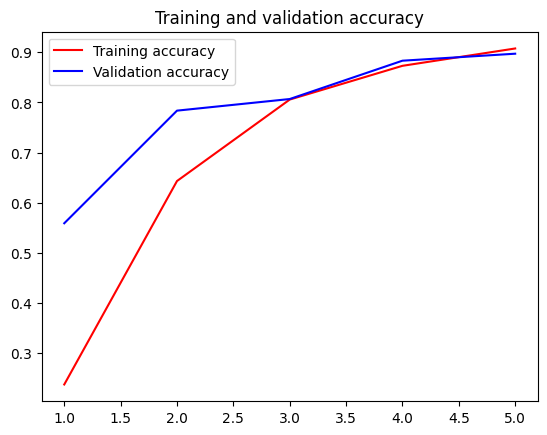

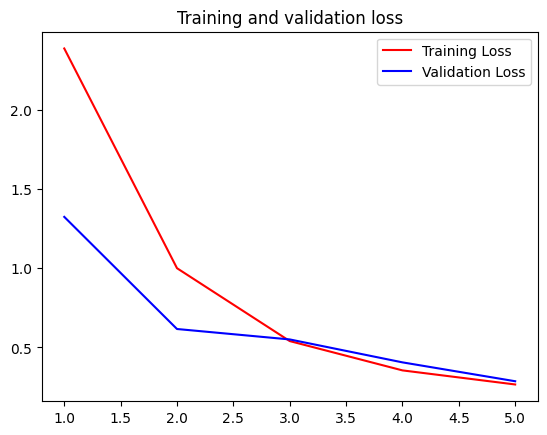

In [17]:
# Create a range of epochs for plotting
epochs = range(1, len(accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

225/225 [==============================] - 4s 17ms/step


<Figure size 1000x1000 with 0 Axes>

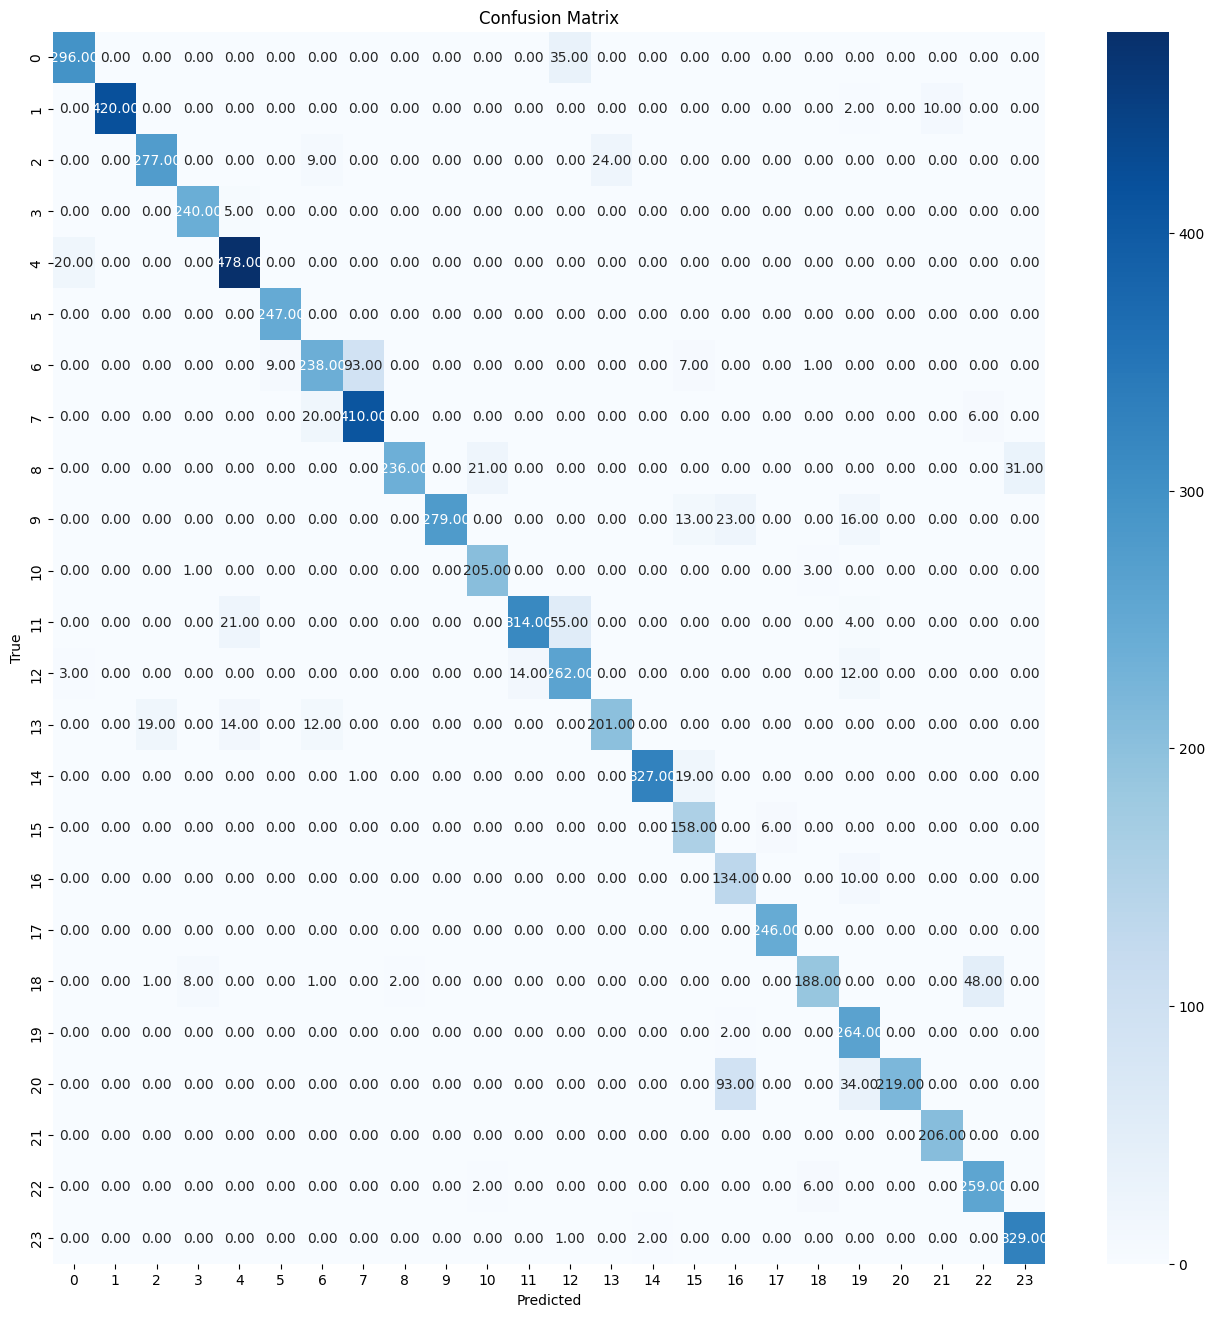

In [18]:
plt.figure(figsize=(10,10))

# Get the confusion matrix
predict_x = model.predict(Test_X)
y_pred = np.argmax(predict_x, axis = 1)
cm = confusion_matrix(Test_Y, y_pred)

fig, ax = plt.subplots(figsize=(16,16))
# Plot the confusion matrix using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues',fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 28ms/step


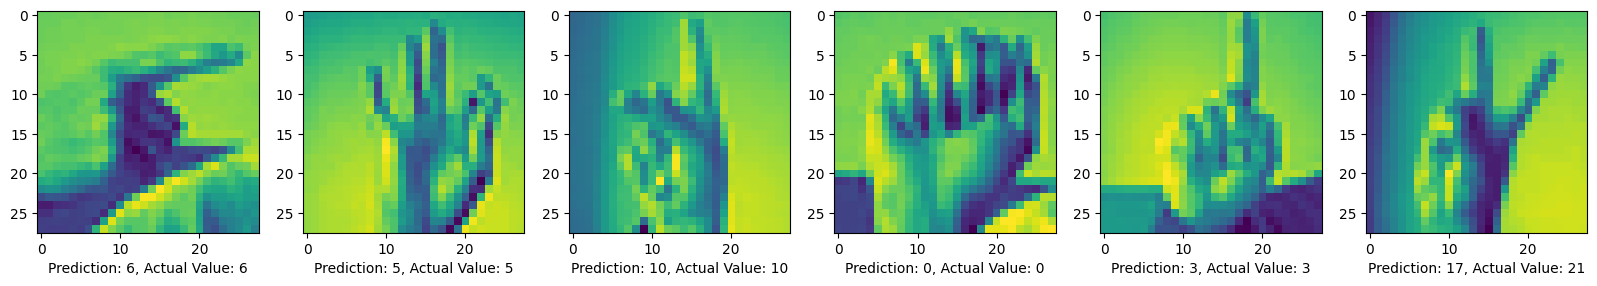

In [19]:
fig, axs = plt.subplots(1, 6, figsize=(20, 4))

for i in range(6):
    testImage = Test_X[i]
    prediction = model.predict(testImage.reshape(-1,28,28,1))
    
    axs[i].imshow(testImage.reshape(28, 28))
    axs[i].set_xlabel(f"Prediction: {np.argmax(prediction)}, Actual Value: {Test_Y[i]}")
plt.show()

In [20]:
import keras

# Define optimizer names and learning rates
optimizers = [("Adam Optimizer", tf.keras.optimizers.Adam(learning_rate=0.001)),    
              ("SGD Optimizer", keras.optimizers.SGD(learning_rate=0.001)),    
              ("RMSprop Optimizer", keras.optimizers.RMSprop(learning_rate=0.001))]

# Train the model for each optimizer
history_all_optimizer = []
for optimizer_name, optimizer in optimizers:
    print(f"\n\n The CNN model is initialized with {optimizer_name}")

    # Define the model architecture


    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, 2, input_shape=(28, 28, 1), activation='relu'))
    model.add(tf.keras.layers.Conv2D(64,2, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))


    model.add(tf.keras.layers.Conv2D(32, 2, input_shape=(28, 28, 1), activation='relu'))
    model.add(tf.keras.layers.Conv2D(64,2, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))


    model.add(tf.keras.layers.Conv2D(32, 2, input_shape=(28, 28, 1), activation='relu'))
    model.add(tf.keras.layers.Conv2D(64,2, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(26, activation='softmax'))


    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(Train_X, Train_Y, epochs=5, validation_data=(Test_X, Test_Y))

    history_all_optimizer.append(history)



 The CNN model is initialized with Adam Optimizer
Epoch 1/5
858/858 [==============================] - 87s 98ms/step - loss: 2.2341 - accuracy: 0.2903 - val_loss: 0.9282 - val_accuracy: 0.6669
Epoch 2/5
858/858 [==============================] - 82s 95ms/step - loss: 0.7784 - accuracy: 0.7199 - val_loss: 0.4876 - val_accuracy: 0.8206
Epoch 3/5
858/858 [==============================] - 81s 94ms/step - loss: 0.4761 - accuracy: 0.8244 - val_loss: 0.3527 - val_accuracy: 0.8675
Epoch 4/5
858/858 [==============================] - 78s 91ms/step - loss: 0.3408 - accuracy: 0.8781 - val_loss: 0.3337 - val_accuracy: 0.8741
Epoch 5/5
858/858 [==============================] - 80s 93ms/step - loss: 0.2632 - accuracy: 0.9064 - val_loss: 0.3590 - val_accuracy: 0.8767


 The CNN model is initialized with SGD Optimizer
Epoch 1/5
858/858 [==============================] - 82s 94ms/step - loss: 3.2545 - accuracy: 0.0417 - val_loss: 3.2535 - val_accuracy: 0.0343
Epoch 2/5
858/858 [====================

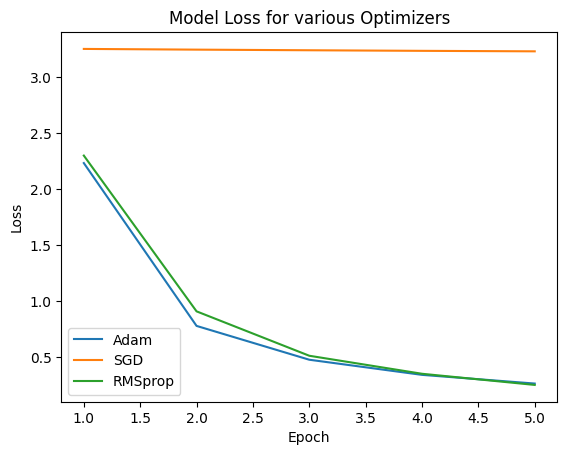

In [21]:
# model loss for Adam, SGD and RMSprop optimizers
epochs = 5
epoch_range = range(1, epochs+1)
plt.plot(epoch_range, history_all_optimizer[0].history['loss'],  label='Adam')
plt.plot(epoch_range, history_all_optimizer[1].history['loss'],  label='SGD')
plt.plot(epoch_range, history_all_optimizer[2].history['loss'],  label='RMSprop')
plt.title('Model Loss for various Optimizers')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

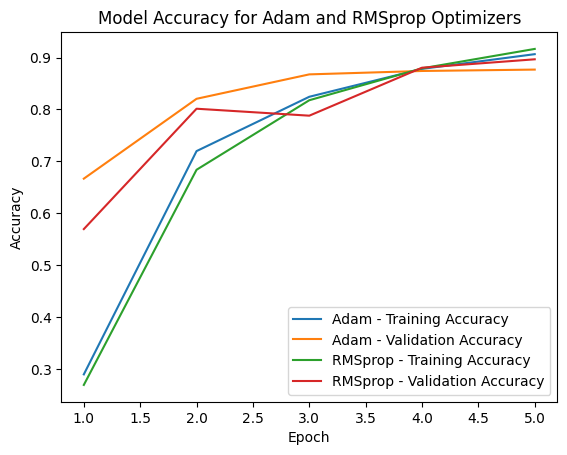

In [22]:
# Plot the training and validation accuracy for Adam and RMSprop optimizers

plt.plot(epoch_range, history_all_optimizer[0].history['accuracy'], label='Adam - Training Accuracy')
plt.plot(epoch_range, history_all_optimizer[0].history['val_accuracy'], label='Adam - Validation Accuracy')
plt.plot(epoch_range, history_all_optimizer[2].history['accuracy'], label='RMSprop - Training Accuracy')
plt.plot(epoch_range, history_all_optimizer[2].history['val_accuracy'], label='RMSprop - Validation Accuracy')
plt.title('Model Accuracy for Adam and RMSprop Optimizers')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()